In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_theme()

In [2]:
df = pd.read_csv(r"D:\For Data Portfolios\Linear Regression\Ecommerce Customers")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
# Simple Data Exploration
from pandas_profiling import ProfileReport
ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


In [6]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
# rename columns for better code
df.rename(columns={
    'Email':'email',
    'Address':'address',
    'Avatar':'avatar',
    'Avg. Session Length':'avg_session_length',
    'Time on App':'time_on_app',
    'Time on Website':'time_on_website',
    'Length of Membership':'length_of_membership',
    'Yearly Amount Spent':'yearly_amount_spent'
}, inplace=True)

## Exploratory Data Analysis

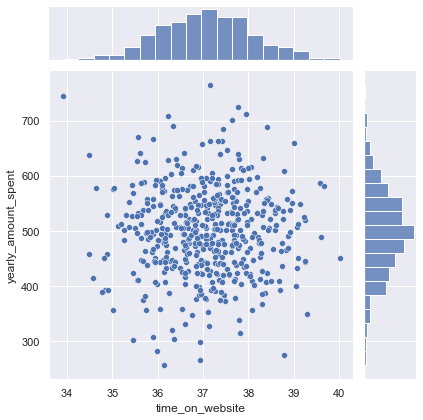

In [10]:
# check corelation between time on website & length of membership
sns.jointplot(x='time_on_website', y='yearly_amount_spent', data=df)

this chart shown that there are no corelation between time on website and yearly amount spent because there are no pattern to show increase of yearly amount spent with higher time on website.

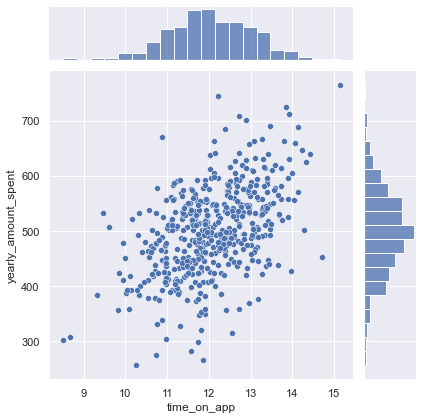

In [11]:
# check corelation between time on apps & length of membership
sns.jointplot(x='time_on_app', y='yearly_amount_spent', data=df)

most of data distribution shown that higher user stay on apps, higher also user spent their money. this shown that transaction on apps better than transaction using website.

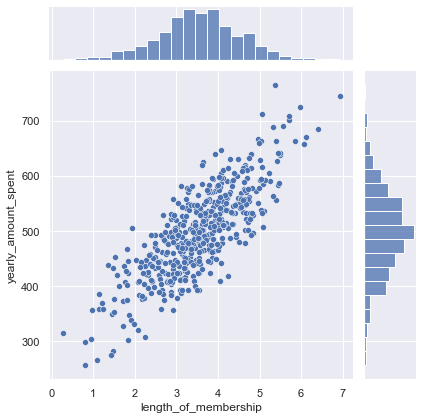

In [13]:
# check corelation between length of membership and yearly amount spend
sns.jointplot(x='length_of_membership', y='yearly_amount_spent', data=df)

there are highly corelation between length of membership and yearly amount spend. because longer user become member higher also amount spend.

# Training & Testing Data

In [15]:
df.columns

Index(['email', 'address', 'avatar', 'avg_session_length', 'time_on_app',
       'time_on_website', 'length_of_membership', 'yearly_amount_spent'],
      dtype='object')

In [16]:
# split dependent & independent variable into new variable
X = df[['avg_session_length', 'time_on_app', 'time_on_website', 'length_of_membership']]
y = df['yearly_amount_spent']

In [19]:
# splitting data into train & test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# create instance of a LinearRegression() model
lm = LinearRegression()

In [22]:
# fit train data
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
# print the coeficient
print('Coeficient : \n', lm.coef_)

Coeficient : 
 [25.98154972 38.59015875  0.19040528 61.27909654]


### Predict Test Data

In [24]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

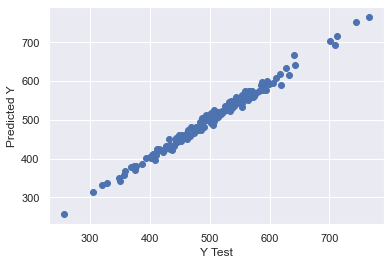

In [25]:
# create scatterplot to compare real tet values & prediction values
plt.scatter(y_test, prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating Model

calculate Mean Absolute Erroe, Mean Squared Error and Root Mean Squared Error.

In [26]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, prediction))
print('MSE: ', metrics.mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  7.228148653430828
MSE:  79.81305165097427
RMSE:  8.933815066978624


## Residual
plot a histogram to check data normal distributed.

<AxesSubplot:ylabel='Density'>

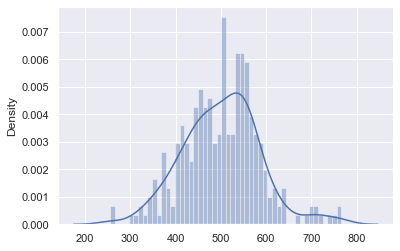

In [27]:
sns.distplot((y_test, prediction), bins=50)

# Conclusion
We still want to figure out the answer to original question, do we need to focus our effort on mobile apps or website development? or maybe that doesn't really matter, and membership time is what is really important. let's see if we can interpret the coefficient at all to get an idea.

In [28]:
coefficient = pd.DataFrame(lm.coef_, X.columns)
coefficient.columns = ['Coefficient']
coefficient

,Coefficient
avg_session_length,25.981550
time_on_app,38.590159
time_on_website,0.190405
length_of_membership,61.279097


**Interpreting Coefficient**

- Increasing 1 unit in **avg_session_length** means increasing **25.98 dollars spent.**
- Increasing 1 unit in **time_on_app** means increasing **38.59 dollar spent.**
- Increasing 1 unit in **time_on_website** means increasing **0.90 dollars spent.**
- Increasing 1 unit in **length_of_membership** means increasing **61.27 dollars spent.**